In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics


In [13]:
test_data=pd.read_csv('/Users/jinglinhui/Desktop/Data_analytics_project/log_regression/test.csv')
train_data=pd.read_csv('/Users/jinglinhui/Desktop/Data_analytics_project/log_regression/train.csv')

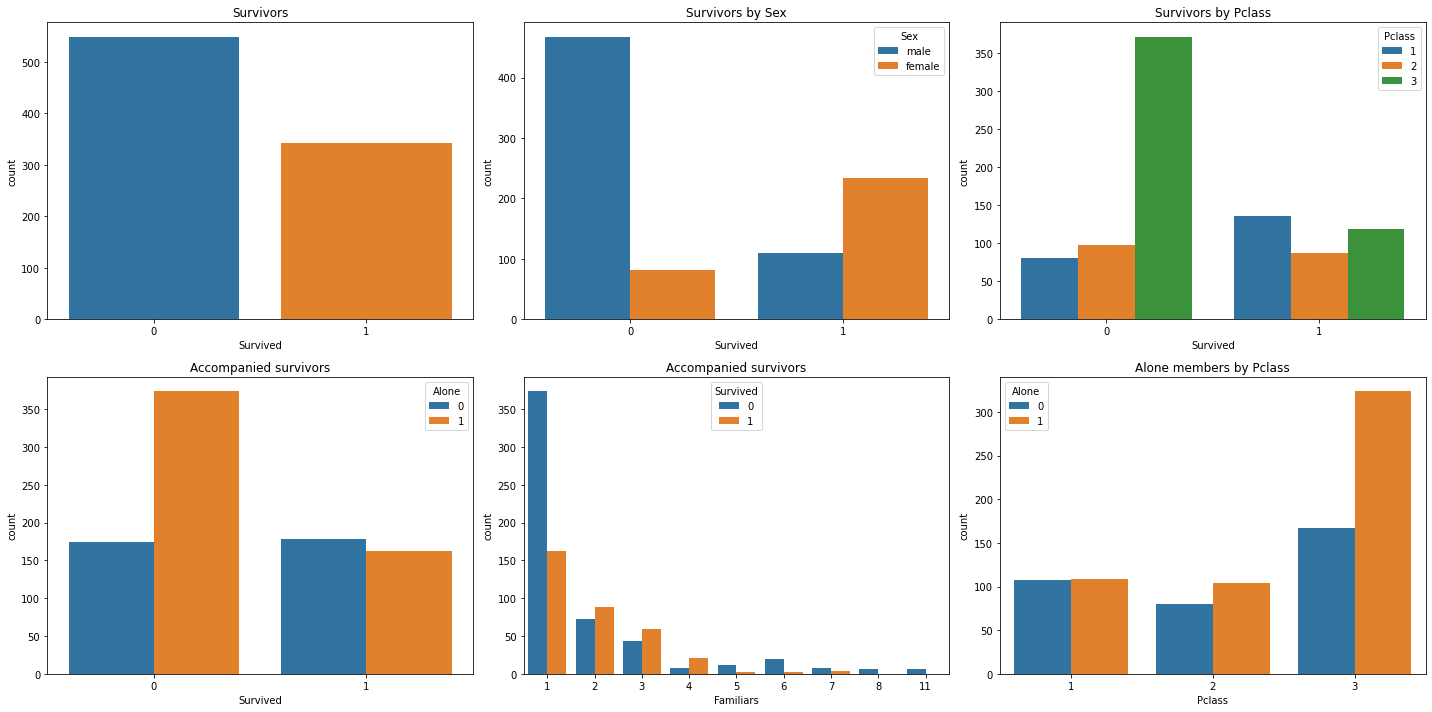

In [14]:
def create_alone_feature(SibSp_Parch):
    if (SibSp_Parch[0]+SibSp_Parch[1])==0:
        return 1
    else:
        return 0
 
train_data['Alone'] = train_data[['SibSp','Parch']].apply(create_alone_feature, axis=1)
train_data['Familiars'] = 1 + train_data['SibSp'] + train_data['Parch']

test_data['Alone'] = test_data[['SibSp','Parch']].apply(create_alone_feature, axis=1)
test_data['Familiars'] = 1 + test_data['SibSp'] + test_data['Parch']

fig, axx = plt.subplots(2, 3, figsize=(20,10))
axx[0,0].set_title('Survivors')
sns.countplot(x='Survived', data=train_data, ax=axx[0,0])
axx[0,1].set_title('Survivors by Sex')
sns.countplot(x='Survived', hue='Sex', data=train_data, ax=axx[0,1])
axx[0,2].set_title('Survivors by Pclass')
sns.countplot(x='Survived', hue='Pclass', data=train_data, ax=axx[0,2])
axx[1,0].set_title('Accompanied survivors')
sns.countplot(x='Survived', hue='Alone', data=train_data, ax=axx[1,0])
axx[1,1].set_title('Accompanied survivors')
sns.countplot(x='Familiars', hue='Survived', data=train_data, ax=axx[1,1])
axx[1,2].set_title('Alone members by Pclass')
sns.countplot(x='Pclass', hue='Alone', data=train_data, ax=axx[1,2])
plt.tight_layout()

In [15]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Familiars
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1


In [16]:
train_data = train_data.drop(['PassengerId'], axis=1)

In [17]:
train_data['Age'] = train_data.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.mean()))
train_data["Embarked"].fillna(train_data['Embarked'].value_counts().idxmax(), inplace=True)

In [18]:
train_data["Sex"] = train_data["Sex"].map({'male':1, 'female':0})
embarked =pd.get_dummies(train_data['Embarked'],drop_first=True)
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Familiars
0,0,3,"Braund, Mr. Owen Harris",1,22.00,1,0,A/5 21171,7.2500,NaN,S,0,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,PC 17599,71.2833,C85,C,0,2
2,1,3,"Heikkinen, Miss. Laina",0,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00,1,0,113803,53.1000,C123,S,0,2
4,0,3,"Allen, Mr. William Henry",1,35.00,0,0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.00,0,0,211536,13.0000,NaN,S,1,1
887,1,1,"Graham, Miss. Margaret Edith",0,19.00,0,0,112053,30.0000,B42,S,1,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.75,1,2,W./C. 6607,23.4500,NaN,S,0,4
889,1,1,"Behr, Mr. Karl Howell",1,26.00,0,0,111369,30.0000,C148,C,1,1


In [19]:
train_data = pd.concat([train_data, embarked], axis=1)

In [20]:
train_data.drop('Cabin', axis=1, inplace=True)
train_data.drop("Name", inplace=True, axis=1)
train_data.drop("Ticket", inplace=True, axis=1)
train_data.drop("Embarked", inplace=True, axis=1)
train_data.drop("SibSp", inplace=True, axis=1)
train_data.drop("Parch", inplace=True, axis=1)

In [21]:
train_data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
Fare         0
Alone        0
Familiars    0
Q            0
S            0
dtype: int64

In [22]:
test_data['Age'] = test_data.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.mean()))
test_data["Embarked"].fillna(test_data['Embarked'].value_counts().idxmax(), inplace=True)
test_data["Sex"] = test_data["Sex"].map({'male':1, 'female':0})
embarked_test = pd.get_dummies(test_data["Embarked"], drop_first=True)
test_data = pd.concat([test_data, embarked_test], axis=1)

In [24]:
test_data = test_data.drop(['PassengerId'], axis=1)
test_data.drop('Cabin', axis=1, inplace=True)
test_data.drop("Name", inplace=True, axis=1)
test_data.drop("Ticket", inplace=True, axis=1)
test_data.drop("Embarked", inplace=True, axis=1)
test_data.drop("SibSp", inplace=True, axis=1)
test_data.drop("Parch", inplace=True, axis=1)

In [25]:
test_data.isnull().sum()

Pclass       0
Sex          0
Age          0
Fare         1
Alone        0
Familiars    0
Q            0
S            0
dtype: int64

In [28]:
train_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Alone,Familiars,Q,S
0,0,3,1,22.000000,7.2500,0,2,0,1
1,1,1,0,38.000000,71.2833,0,2,0,0
2,1,3,0,26.000000,7.9250,1,1,0,1
3,1,1,0,35.000000,53.1000,0,2,0,1
4,0,3,1,35.000000,8.0500,1,1,0,1
5,0,3,1,26.507589,8.4583,1,1,1,0
6,0,1,1,54.000000,51.8625,1,1,0,1
7,0,3,1,2.000000,21.0750,0,5,0,1
8,1,3,0,27.000000,11.1333,0,3,0,1
9,1,2,0,14.000000,30.0708,0,2,0,0


In [29]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]

In [30]:
rf = RandomForestClassifier(n_estimators=50,
                            max_features='auto',
                            criterion = 'gini',
                             random_state=1)

In [31]:
import random

In [32]:
def cross_validation_split(X_train, folds):
        X_train_split = []
        df_copy = X_train
        fold_size = int(df_copy.shape[0] / folds)
        
        # for loop to save each fold
        for i in range(folds):
            fold = []
            while len(fold) < fold_size:
                # select a random element
                r = random.randrange(df_copy.shape[0])
                index = df_copy.index[r]
                fold.append(df_copy.loc[index].values.tolist())
                df_copy = df_copy.drop(index)    
            X_train_split.append(np.asarray(fold))
            
        return X_train_split 

In [33]:
index = cross_validation_split(X_train, 10)
index

[array([[3.00000000e+00, 1.00000000e+00, 4.00000000e+00, 2.91250000e+01,
         0.00000000e+00, 6.00000000e+00, 1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 1.00000000e+00, 4.90000000e+01, 8.91042000e+01,
         0.00000000e+00, 2.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.00000000e+00, 1.00000000e+00, 3.60000000e+01, 1.30000000e+01,
         1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [3.00000000e+00, 0.00000000e+00, 1.50000000e+01, 1.44542000e+01,
         0.00000000e+00, 2.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.00000000e+00, 1.00000000e+00, 5.70000000e+01, 1.23500000e+01,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 1.00000000e+00, 4.50000000e+01, 8.34750000e+01,
         0.00000000e+00, 2.00000000e+00, 0.00000000e+00, 1.00000000e+00],
        [1.00000000e+00, 1.00000000e+00, 6.10000000e+01, 3.35000000e+01,
         1.00000000e+00, 1.00000000e+00, 0.00

In [ ]:
def cross_validation(model, X_train, Y_train, k):
    index = kfold_index(X_train, k)
    
    auc = []
    for i in range(k):
        
        
    